In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf
from librosa.display import specshow
import glob

import sklearn

In [2]:
carTrainFile = glob.glob("cars/train/*")
carTestFile = glob.glob("cars/test/*")

tramTrainFile = glob.glob("trams/train/*")
tramTestFile = glob.glob("trams/test/*")

In [3]:
def importFiles(files):
    dataset = []
    sr_ = 0
    
    for file in files:
        data,sr = librosa.load(file)
        data = librosa.effects.trim(data, top_db=20, frame_length=1024, hop_length=512)[0] 

        # Desired length in samples
        desired_length = sr * 5
        
        # # Initialize a new array of zeros with the desired length
        fixed_length_data = np.zeros(desired_length)
        
        #  Check the length of the original data
        original_length = len(data)
        
        # # If original data is longer than desired length, truncate it
        # # If it is shorter, pad with zeros
        if original_length > desired_length:
            fixed_length_data = data[:desired_length]
        else:
            fixed_length_data[:original_length] = data
        # # Now use fixed_length_data as your adjusted data
        data = fixed_length_data

        dataset.append(data)

        if sr_ != sr:
            sr_ = sr

    return dataset, sr_

In [4]:
car_train, srct = importFiles(carTrainFile)
car_test, srcs = importFiles(carTestFile)

tram_train, srtt = importFiles(tramTrainFile)
tram_test, srts = importFiles(tramTestFile)

/tmp/ipykernel_202457/1287227778.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  data,sr = librosa.load(file)
/home/smitty/miniconda3/envs/audioproc/lib/python3.8/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_202457/1287227778.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  data,sr = librosa.load(file)
/home/smitty/miniconda3/envs/audioproc/lib/python3.8/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_202457/1287227778.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  data,sr = librosa.load(file)
/home/smitty/minicond

In [5]:
# dimension check
car_train = np.asarray(car_train)
print(car_train.shape)
print(srct)

(80, 110250)
22050


In [6]:
car_dataset = np.concatenate([car_train, car_test])
tram_dataset = np.concatenate([tram_train, tram_test])

### Feature Analysis

Taking sample

In [7]:
# Example: 10th element of both datasets
tram_sample = tram_dataset[9]
car_sample = car_dataset[9]

sr = srct

MFCC difference from cars and trams

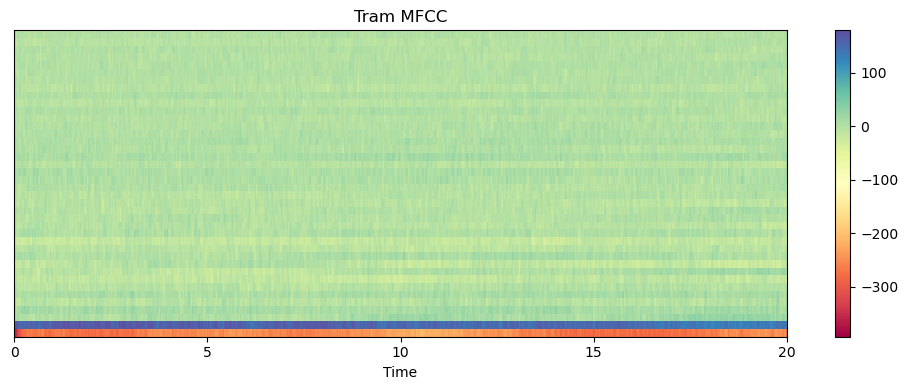

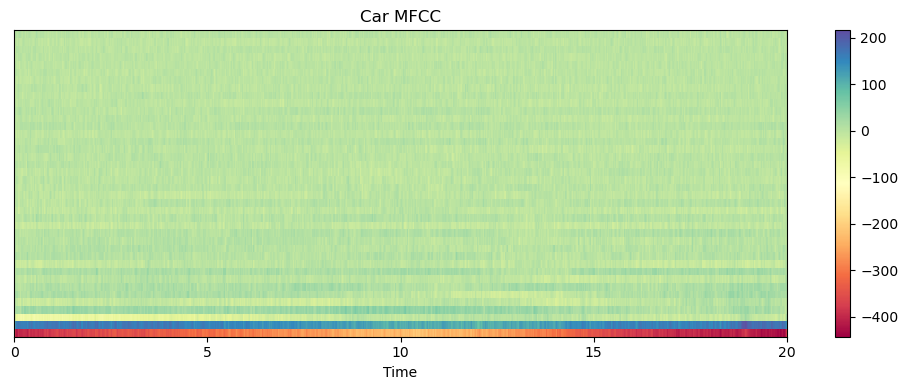

In [8]:
# tram_mfccs = librosa.feature.mfcc(y=tram_sample, sr=sr, n_mfcc=50)
# car_mfccs = librosa.feature.mfcc(y=car_sample, sr=sr, n_mfcc=50)

tram_mfccs = librosa.feature.mfcc(y=tram_sample, sr=sr, S=None, n_mfcc=40, norm='ortho',n_fft=512, hop_length=128)
car_mfccs = librosa.feature.mfcc(y=car_sample, sr=sr, S=None, n_mfcc=40, norm='ortho',n_fft=512, hop_length=128)

plt.figure(figsize=(10, 4))
librosa.display.specshow(tram_mfccs,cmap='Spectral', x_axis='time',sr=sr)
plt.colorbar()
plt.title('Tram MFCC')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(car_mfccs,cmap='Spectral', x_axis='time',sr=sr)
plt.colorbar()
plt.title('Car MFCC')
plt.tight_layout()
plt.show()

Spectral Bandwidth

In [9]:
tram_spec_bandwidth = librosa.feature.spectral_bandwidth(y=tram_sample, sr=sr)
car_spec_bandwidth = librosa.feature.spectral_bandwidth(y=car_sample, sr=sr)

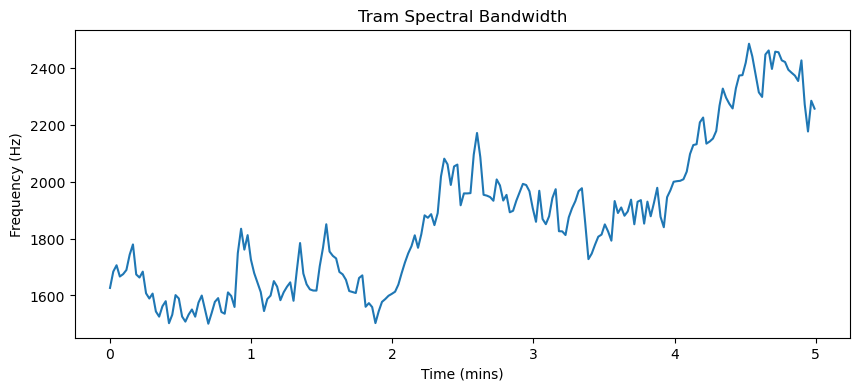

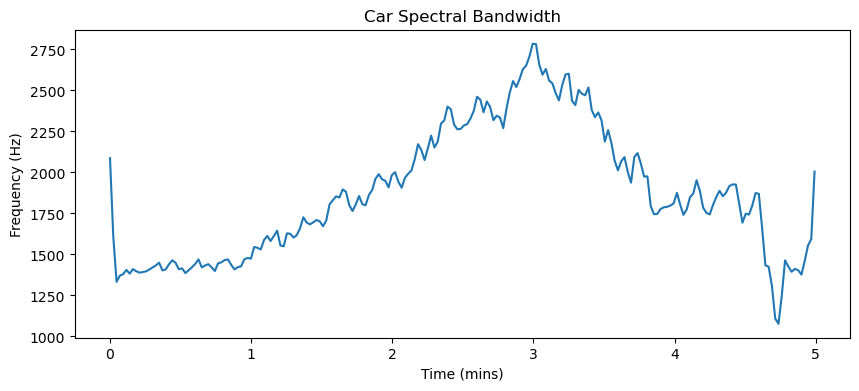

In [10]:
plt.figure(figsize=(10, 4))
t = librosa.times_like(tram_spec_bandwidth)
plt.plot(t, tram_spec_bandwidth[0])
plt.xlabel("Time (mins)")
plt.ylabel("Frequency (Hz)")
plt.title('Tram Spectral Bandwidth')
plt.show()

plt.figure(figsize=(10, 4))
t = librosa.times_like(car_spec_bandwidth)
plt.plot(t, car_spec_bandwidth[0])
plt.xlabel("Time (mins)")
plt.ylabel("Frequency (Hz)")
plt.title('Car Spectral Bandwidth')
plt.show()

Spectral centroid

In [11]:
tram_spec_centroid = librosa.feature.spectral_centroid(y=tram_sample, sr=sr)
car_spec_centroid = librosa.feature.spectral_centroid(y=car_sample, sr=sr)

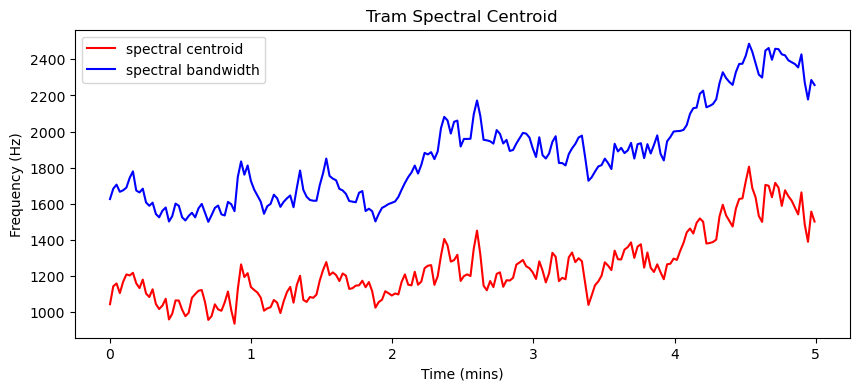

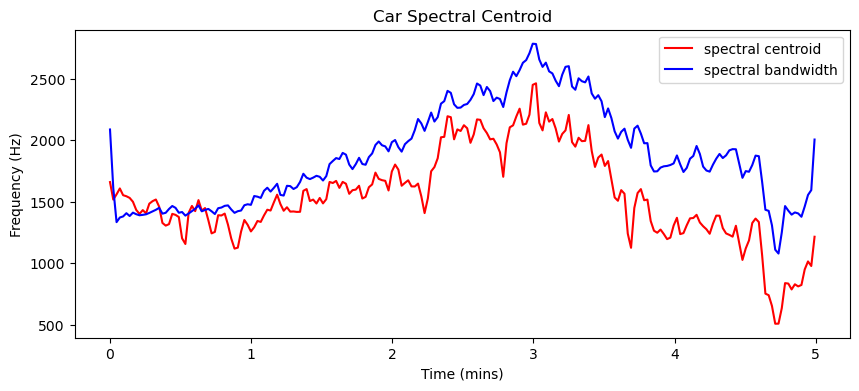

In [12]:
plt.figure(figsize=(10, 4))
t = librosa.times_like(tram_spec_centroid)
plt.plot(t, tram_spec_centroid[0], color='r', label='spectral centroid')
plt.plot(t, tram_spec_bandwidth[0], color='b', label='spectral bandwidth')
plt.xlabel("Time (mins)")
plt.ylabel("Frequency (Hz)")
plt.title('Tram Spectral Centroid')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
t = librosa.times_like(car_spec_centroid)
plt.plot(t, car_spec_centroid[0], color='r', label='spectral centroid')
plt.plot(t, car_spec_bandwidth[0], color='b', label='spectral bandwidth')
plt.xlabel("Time (mins)")
plt.ylabel("Frequency (Hz)")
plt.title('Car Spectral Centroid')
plt.legend()
plt.show()

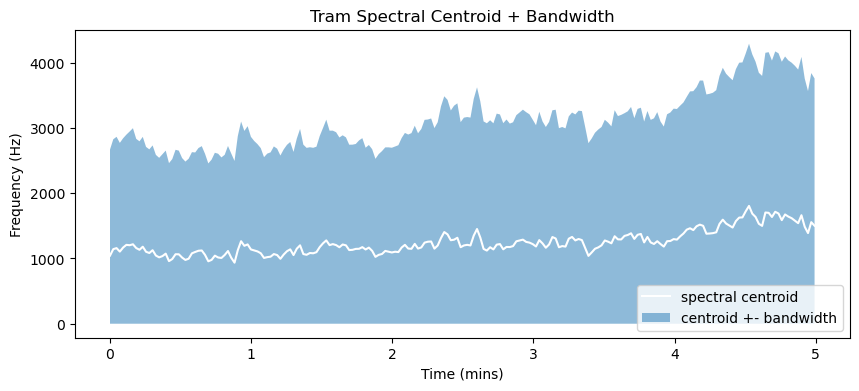

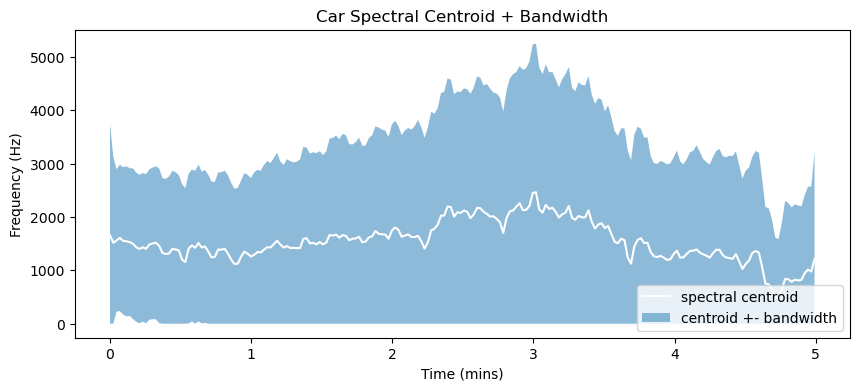

In [13]:
plt.figure(figsize=(10, 4))
t = librosa.times_like(tram_spec_centroid)
plt.plot(t, tram_spec_centroid[0], color='w', label='spectral centroid')
plt.fill_between(t, 
                 np.maximum(0, tram_spec_centroid[0] - tram_spec_bandwidth[0]), 
                 np.minimum(tram_spec_centroid[0] + tram_spec_bandwidth[0], sr/2),
                 alpha=0.5, label='centroid +- bandwidth')
plt.xlabel("Time (mins)")
plt.ylabel("Frequency (Hz)")
plt.title('Tram Spectral Centroid + Bandwidth')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 4))
t = librosa.times_like(car_spec_centroid)
plt.plot(t, car_spec_centroid[0], color='w', label='spectral centroid')
plt.fill_between(t, 
                 np.maximum(0, car_spec_centroid[0] - car_spec_bandwidth[0]), 
                 np.minimum(car_spec_centroid[0] + car_spec_bandwidth[0], sr/2),
                 alpha=0.5, label='centroid +- bandwidth')
plt.xlabel("Time (mins)")
plt.ylabel("Frequency (Hz)")
plt.title('Car Spectral Centroid + Bandwidth')
plt.legend(loc='lower right')
plt.show()

Spectral Contrast

In [14]:
tram_spec_contrast = librosa.feature.spectral_contrast(y=tram_sample, sr=sr)
car_spec_contrast = librosa.feature.spectral_contrast(y=car_sample, sr=sr)

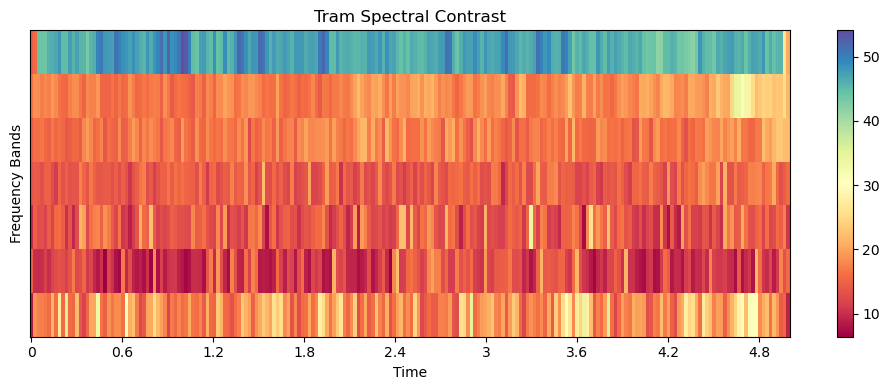

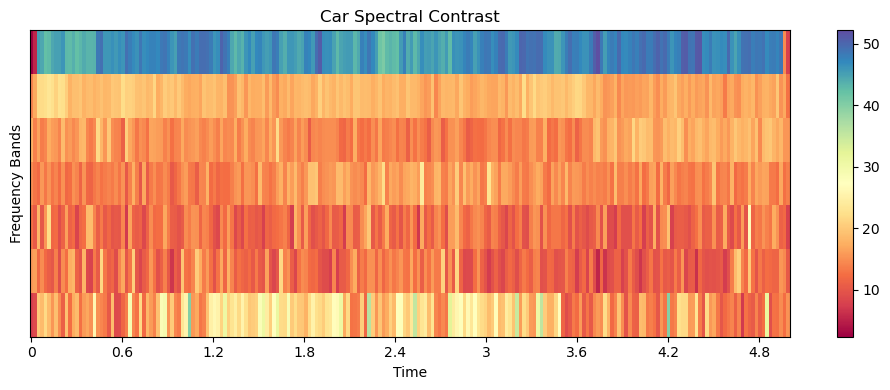

In [15]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(tram_spec_contrast, cmap='Spectral', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Tram Spectral Contrast')
plt.ylabel('Frequency Bands')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(car_spec_contrast, cmap='Spectral', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Car Spectral Contrast')
plt.ylabel('Frequency Bands')
plt.tight_layout()
plt.show()

Zero-crossing rate

In [16]:
tram_zcr = librosa.feature.zero_crossing_rate(y=tram_sample)
car_zcr = librosa.feature.zero_crossing_rate(y=car_sample)

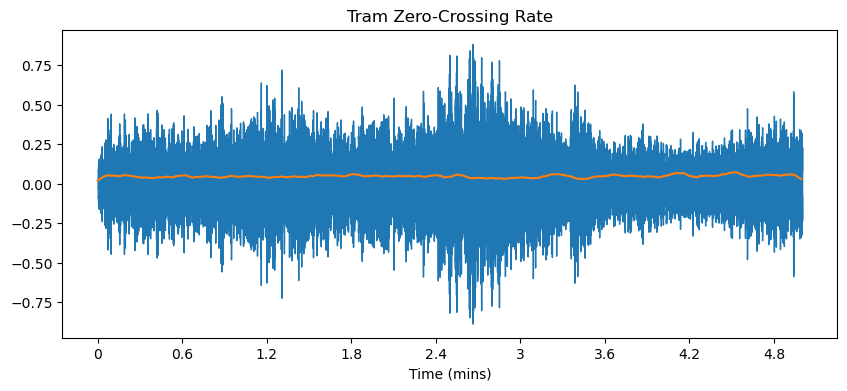

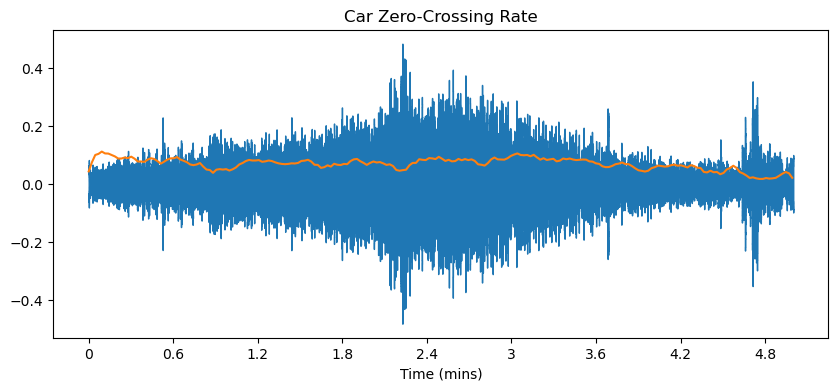

In [17]:
plt.figure(figsize=(10, 4))
t = librosa.times_like(tram_zcr)
librosa.display.waveshow(tram_sample)
plt.plot(t, tram_zcr[0])
plt.xlabel("Time (mins)")
plt.title('Tram Zero-Crossing Rate')
plt.show()

plt.figure(figsize=(10, 4))
t = librosa.times_like(car_zcr)
librosa.display.waveshow(car_sample)
plt.plot(t, car_zcr[0])
plt.xlabel("Time (mins)")
plt.title('Car Zero-Crossing Rate')
plt.show()

Spectral Roll-Off

In [18]:
tram_spect_rolloff = librosa.feature.spectral_rolloff(y=tram_sample, sr=sr)
car_spect_rolloff = librosa.feature.spectral_rolloff(y=car_sample, sr=sr)

In [19]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

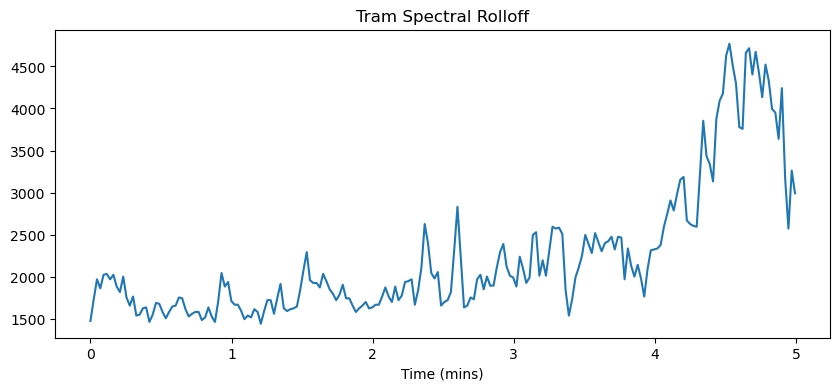

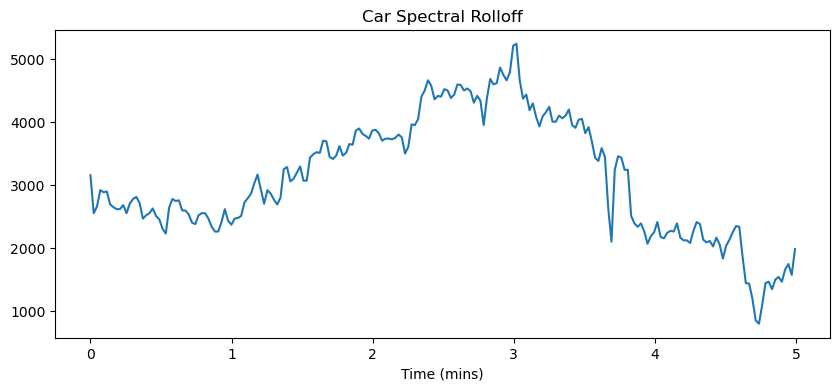

In [20]:
plt.figure(figsize=(10, 4))
t = librosa.times_like(tram_spect_rolloff[0])
plt.plot(t, tram_spect_rolloff[0])
plt.xlabel("Time (mins)")
plt.title('Tram Spectral Rolloff')
plt.show()

plt.figure(figsize=(10, 4))
t = librosa.times_like(car_spect_rolloff[0])
plt.plot(t, car_spect_rolloff[0])
plt.xlabel("Time (mins)")
plt.title('Car Spectral Rolloff')
plt.show()

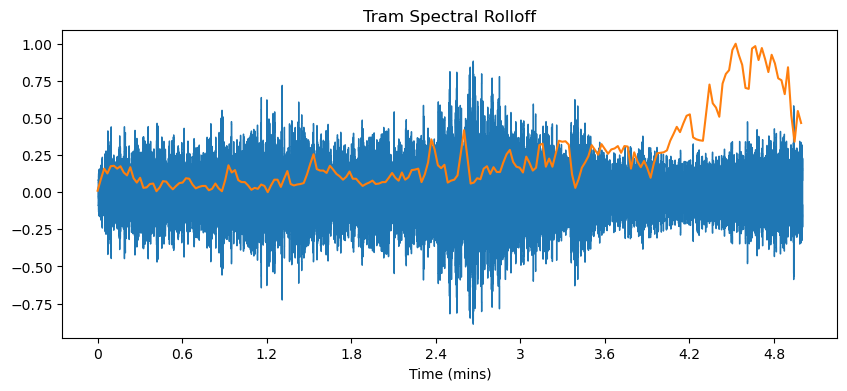

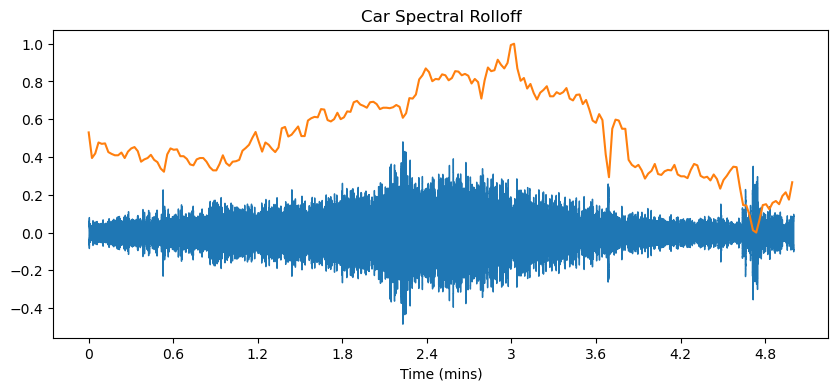

In [21]:
plt.figure(figsize=(10, 4))
t = librosa.times_like(tram_spect_rolloff[0])
librosa.display.waveshow(tram_sample)
plt.plot(t, normalize(tram_spect_rolloff[0]))
plt.xlabel("Time (mins)")
plt.title('Tram Spectral Rolloff')
plt.show()

plt.figure(figsize=(10, 4))
t = librosa.times_like(car_spect_rolloff[0])
librosa.display.waveshow(car_sample)
plt.plot(t, normalize(car_spect_rolloff[0]))
plt.xlabel("Time (mins)")
plt.title('Car Spectral Rolloff')
plt.show()